# Verifying whether the dataset is cleaned or not

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [16]:
#reading the dataset
df = pd.read_excel('/home/pragya/fyp/date_data.xlsx')
df.head()

,date,so2,no2,rspm,spm
0,2008-1-1,4.000000,36.500000,131.000000,388.000000
1,2008-1-2,4.948598,47.769626,249.912281,464.264151
2,2008-1-3,4.948598,47.769626,249.912281,464.264151
3,2008-1-4,4.000000,40.700000,164.000000,458.000000
4,2008-1-5,4.948598,47.769626,249.912281,464.264151


## Checking for null values

In [3]:
#for date column
date_null_check1 = pd.isnull(df['date'])
date_null_check1.sum()

#for so2 column
date_null_check2 = pd.isnull(df['so2'])
date_null_check2.sum()

#for no2 column
date_null_check3 = pd.isnull(df['no2'])
date_null_check3.sum()

#for rspm column
date_null_check4 = pd.isnull(df['rspm'])
date_null_check4.sum()

#for spm column
date_null_check5 = pd.isnull(df['spm'])
date_null_check5.sum()

0

Sum of is null function will be zero here because we have filled all the cells with mean/median imputated data.
<br>Thus we have correctly filled all the cells.

## Checking datatypes

Through preliminary analysis (in comments) we understood that values in the columns no2,so2,spm and rspm in the dataset are stored in <b>float</b> data type.<br>
This is tested by using a for loop and by printing an appropriate message on successful completion of the test.  

### NO2

In [7]:
# value_dataType_check = df['no2'][0]
# print(type(value_dataType_check))
flag = 0
for i in df['no2']:
    if(type(i)==float):
        continue
    else:
        print(i, type(i))
        flag = 1

if(flag==0):
    print("All values are stored in float data type")

All values are stored in float data type


### SO2

In [8]:
# value_dataType_check = df['so2'][0]
# print(type(value_dataType_check))
flag = 0
for i in df['so2']:
    if(type(i)==float):
        continue
    else:
        print(i, type(i))
        flag = 1

if(flag==0):
    print("All values are stored in float data type")

All values are stored in float data type


### RSPM

In [10]:
# value_dataType_check = df['rspm'][0]
# print(type(value_dataType_check))
flag = 0
for i in df['rspm']:
    if(type(i)==float):
        continue
    else:
        print(i, type(i))
        flag = 1

if(flag==0):
    print("All values are stored in float data type")

All values are stored in float data type


### SPM

In [12]:
# value_dataType_check = df['spm'][0]
# print(type(value_dataType_check))
flag = 0
for i in df['spm']:
    if(type(i)==float):
        continue
    else:
        print(i, type(i))
        flag = 1

if(flag==0):
    print("All values are stored in float data type")

All values are stored in float data type


## Verifying date formats

<h3>Uniform Format Test</h3>

The <b>datetime.strptime</b> function of <b>datetime</b> library in python, was used to validate the format of all the values in <b>Date</b> column in the dataset.<br>
The format to be used in this dataset is <b>YYYY-MM-DD</b>.<br>
Using a for loop each entry was tested for the correct format with the help of <b>datetime.strptime</b> function. On error in the date format, the fuction throws a <b>ValueError</b> which is handled as shown below.<br>
On successful completion of the test, an appropriate message is displayed.<br><br>
<b>COMMENTS</b> - To understand the working of <b>datetime.strptime</b> function of <b>datetime</b> library in python.

In [13]:
# date_format_check = df['date'][0]
# print(date_format_check, type(date_format_check))
# new_date = dt.datetime.strptime(date_format_check, "%Y-%m-%d")
# print(new_date, type(new_date))

flag = 0
for i in range(0, len(df['date'])):
    try:
        date = dt.datetime.strptime(df['date'][i], "%Y-%m-%d")
    except ValueError:
        flag = 1
        print(i)

if(flag==0):
    print("All dates are stored in YYYY-MM-DD format")

All dates are stored in YYYY-MM-DD format


<h3>Daily Updates Test</h3>

In this test, we check whether the values are recorded daily.

In [19]:
dates_in_datetime = pd.DataFrame(columns=['Date'])
dates_in_datetime['Date']= pd.to_datetime(df['date']) 
type(dates_in_datetime['Date'][0])

one_day = dt.timedelta(days=1)
flag = 0
for i in range(1, len(dates_in_datetime['Date'])):
    if((dates_in_datetime['Date'][i] - dates_in_datetime['Date'][i-1]) == one_day):
        continue
    else:
        flag=1

if(flag==0):
    print("Values are recorded on a daily basis")
else:
    print("Values are not recorded on a daily basis")

Values are recorded on a daily basis


<h3>Outliers Test</h3>

In this test, we check whether the dates have any outliers.<br>
An outliers could be of the form where date is recorded in <b>YYYY-DD-MM</b> instead of <b>YYYY-MM-DD</b> and the $DD<=12$.<br>
In such cases, the previous test of formats would fail to detect such values.<br>
Outliers of this form(if any) are identifed via simple plotting using <b>matplotlib.pyplot</b> library in python.

Text(0,0.5,'Dates')

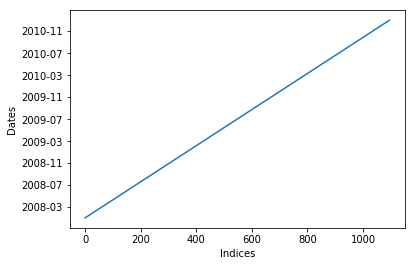

In [20]:
#dates_in_datetime.index
x = [i for i in range(0, 1096)]
y = dates_in_datetime['Date']

plt.plot(x,y)

plt.xlabel("Indices")
plt.ylabel("Dates")

<h2>Valid Format Test</h2>

In this case, the values recorded under the <b>no2, so2, spm, rspm</b> field must always be non-negative.<br>
The for loop tests this attribute and an appropriate message is printed on successful execution of the test.

### no2

In [21]:
flag = 0
for i in range(0, len(df['no2'])):
    if(df['no2'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")

All prices recorded are non negative


### so2

In [22]:
flag = 0
for i in range(0, len(df['so2'])):
    if(df['so2'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")

All prices recorded are non negative


### rspm

In [23]:
flag = 0
for i in range(0, len(df['rspm'])):
    if(df['rspm'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")

All prices recorded are non negative


### spm

In [24]:
flag = 0
for i in range(0, len(df['spm'])):
    if(df['spm'][i]<0):
        flag = 1
        print(i)
    else:
        continue

if(flag == 0):
    print("All prices recorded are non negative")

All prices recorded are non negative


Thus all the cells are non negative.